In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
sfr_url = 'Data/City_Zhvi_SingleFamilyResidence.csv'
condo_url = 'Data/City_Zhvi_Condominum.csv'
sfr = pd.read_csv(sfr_url, encoding='windows-1252')
condo = pd.read_csv(condo_url, encoding='windows-1252')

In [3]:
sfr = sfr.drop(['Metro', 'CountyName', 'SizeRank'], axis=1)
condo = condo.drop(['Metro', 'CountyName', 'SizeRank'], axis=1)

In [4]:
sfr.head()

,RegionID,RegionName,State,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11
0,6181,New York,NY,171900.0,172100.0,172400.0,172500.0,172500.0,172400.0,172300.0,...,572800,579500,584900,589700,593800,597100,599200,603400,610700,616800
1,12447,Los Angeles,CA,166400.0,165900.0,165500.0,164900.0,164500.0,164100.0,163800.0,...,704500,709200,711100,712500,713500,714700,716500,719000,722400,726200
2,17426,Chicago,IL,112000.0,113100.0,113900.0,114300.0,114100.0,113600.0,112500.0,...,203400,205300,207000,208300,208600,208700,209200,210000,210700,211500
3,39051,Houston,TX,89100.0,89000.0,89000.0,89200.0,89500.0,89800.0,90200.0,...,182100,183600,184700,185900,186800,187800,188700,189400,190200,191000
4,6915,San Antonio,TX,87300.0,87100.0,87000.0,86800.0,86700.0,86600.0,86600.0,...,165000,166700,167500,168000,168900,170000,170900,172000,173200,174000


In [5]:
sfr.RegionName.describe()

count          12937
unique          9059
top       Washington
freq              28
Name: RegionName, dtype: object

In [6]:
sfr.shape

(12937, 275)

In [7]:
condo.head()

,RegionID,RegionName,State,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11
0,6181,New York,NY,160800.0,161400.0,162000.0,162600.0,163100.0,163500.0,163700.0,...,834000,836700,839400,841200,840400,837400,835700,836700,836200,834500
1,12447,Los Angeles,CA,130800.0,130300.0,129700.0,129200.0,128700.0,128300.0,128000.0,...,539400,543600,545200,546000,545900,546000,546900,548500,550900,553600
2,17426,Chicago,IL,113600.0,115300.0,116900.0,118200.0,119100.0,119700.0,119700.0,...,257800,258300,257800,256800,255500,254300,253300,252000,251100,251200
3,39051,Houston,TX,58600.0,59000.0,59300.0,59700.0,60100.0,60400.0,60700.0,...,104700,105600,106400,106300,106200,107000,108300,109000,108900,108800
4,6915,San Antonio,TX,66000.0,66000.0,66000.0,66000.0,66000.0,66000.0,66100.0,...,117500,118900,119600,120200,120400,120600,121200,121900,122500,123200


In [8]:
condo.shape

(2881, 275)

In [9]:
condo.RegionName.describe()

count        2881
unique       2480
top       Jackson
freq            7
Name: RegionName, dtype: object

In [10]:
sfr2 = pd.melt(sfr, value_vars=sfr.iloc[:, 3:275], id_vars=['RegionID', 'RegionName', 'State'])


In [11]:
sfr2.columns = ['RegionID', 'RegionName', 'State', 'Month', 'Price']

In [12]:
sfr2 = sfr2.set_index('Month')

In [14]:
sfr2.index = pd.DatetimeIndex(sfr2.index)

In [15]:
sfr2.head()

,RegionID,RegionName,State,Price
Month,,,,
1996-04-01,6181,New York,NY,171900.0
1996-04-01,12447,Los Angeles,CA,166400.0
1996-04-01,17426,Chicago,IL,112000.0
1996-04-01,39051,Houston,TX,89100.0
1996-04-01,6915,San Antonio,TX,87300.0


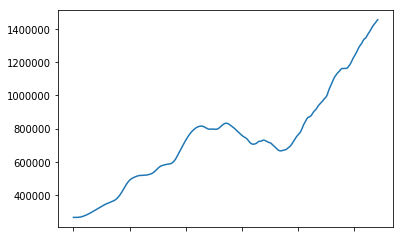

In [67]:
sfr.iloc[13, 3:275].plot()